# Data Acquisition

In [38]:
import math
from datetime import date, timedelta, datetime

import requests
import pandas as pd
from loguru import logger

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

# check the tensorflow version and the number of available GPUs
print('Tensorflow Version: ' + tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

# Setting the timeframe for the data extraction
end_date =  date.today().strftime("%Y-%m-%d")

Tensorflow Version: 2.10.0
Num GPUs: 1


In [25]:
days = range(1, 32)
months = range(1, 13)
years = range(2013, 2023)
day_summary = "https://www.mercadobitcoin.net/api/{coin}/day-summary/{year}/{month}/{day}/"
coin = "BTC"
coin_info = []
sample_json = sample_json = {
    "date": "2022-09-02",
    "opening": 105024.1362104,
    "closing": 103517.33893317,
    "lowest": 102759.09207443,
    "highest": 106234.45856376,
    "volume": "4252248.79130990",
    "quantity": "40.62196075",
    "amount": 2933,
    "avg_price": 104678.57072383,
}

In [4]:
for year in years:
    for month in months:
        
        if year == 2022 and month > 9:
            continue

        for day in days:
            
            if month == 9 and day >= 19:
                continue

            url = day_summary.format(coin=coin, year=year, month=month, day=day)
            response = requests.get(url=url)
            
            if response.status_code != 200:
                logger.debug(f"Error on request | response {response} | url {url}")
                continue
            else:
                logger.info(f"Success on requested url. Date: {year}-{month}-{day}")
                
            coin_info.append(response.json())

2022-09-21 18:24:50.026 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/1/1/
2022-09-21 18:24:50.267 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/1/2/
2022-09-21 18:24:50.549 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/1/3/
2022-09-21 18:24:50.790 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/1/4/
2022-09-21 18:24:51.053 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/1/5/
2022-09-21 18:24:51.331 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.ne

2022-09-21 18:25:02.432 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/2/18/
2022-09-21 18:25:02.677 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/2/19/
2022-09-21 18:25:02.944 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/2/20/
2022-09-21 18:25:03.218 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/2/21/
2022-09-21 18:25:03.506 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/2/22/
2022-09-21 18:25:03.770 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitco

2022-09-21 18:25:15.326 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/4/4/
2022-09-21 18:25:15.605 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/4/5/
2022-09-21 18:25:15.876 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/4/6/
2022-09-21 18:25:16.148 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/4/7/
2022-09-21 18:25:16.417 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/4/8/
2022-09-21 18:25:16.686 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.ne

2022-09-21 18:25:27.883 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/5/21/
2022-09-21 18:25:28.128 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/5/22/
2022-09-21 18:25:28.498 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/5/23/
2022-09-21 18:25:28.762 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/5/24/
2022-09-21 18:25:29.008 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitcoin.net/api/BTC/day-summary/2013/5/25/
2022-09-21 18:25:29.310 | DEBUG    | __main__:<module>:16 - Error on request | response <Response [404]> | url https://www.mercadobitco

2022-09-21 18:25:45.491 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-7-25
2022-09-21 18:25:45.756 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-7-26
2022-09-21 18:25:46.015 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-7-27
2022-09-21 18:25:46.278 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-7-28
2022-09-21 18:25:46.539 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-7-29
2022-09-21 18:25:46.792 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-7-30
2022-09-21 18:25:47.048 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-7-31
2022-09-21 18:25:47.305 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-8-1
2022-09-21 18:25:47.575 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-8-2
2022-09-21 18:25:47.837 | INFO     | __main__:<module>:19 - Success on requested url

2022-09-21 18:26:06.715 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-10-26
2022-09-21 18:26:06.958 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-10-27
2022-09-21 18:26:07.193 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-10-28
2022-09-21 18:26:07.448 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-10-29
2022-09-21 18:26:07.673 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-10-30
2022-09-21 18:26:07.927 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-10-31
2022-09-21 18:26:08.200 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-11-1
2022-09-21 18:26:08.454 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-11-2
2022-09-21 18:26:08.703 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2013-11-3
2022-09-21 18:26:08.957 | INFO     | __main__:<module>:19 - Success on reque

2022-09-21 18:26:27.416 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-1-13
2022-09-21 18:26:27.712 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-1-14
2022-09-21 18:26:27.973 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-1-15
2022-09-21 18:26:28.240 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-1-16
2022-09-21 18:26:28.517 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-1-17
2022-09-21 18:26:28.778 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-1-18
2022-09-21 18:26:29.063 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-1-19
2022-09-21 18:26:29.321 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-1-20
2022-09-21 18:26:29.580 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-1-21
2022-09-21 18:26:29.830 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:26:49.075 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-4-1
2022-09-21 18:26:49.344 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-4-2
2022-09-21 18:26:49.599 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-4-3
2022-09-21 18:26:49.859 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-4-4
2022-09-21 18:26:50.133 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-4-5
2022-09-21 18:26:50.386 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-4-6
2022-09-21 18:26:50.641 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-4-7
2022-09-21 18:26:50.902 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-4-8
2022-09-21 18:26:51.160 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-4-9
2022-09-21 18:26:51.435 | INFO     | __main__:<module>:19 - Success on requested url. Date:

2022-09-21 18:27:10.256 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-6-20
2022-09-21 18:27:10.518 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-6-21
2022-09-21 18:27:10.789 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-6-22
2022-09-21 18:27:11.076 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-6-23
2022-09-21 18:27:11.345 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-6-24
2022-09-21 18:27:11.601 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-6-25
2022-09-21 18:27:11.850 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-6-26
2022-09-21 18:27:12.119 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-6-27
2022-09-21 18:27:12.384 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-6-28
2022-09-21 18:27:12.663 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:27:31.197 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-9-8
2022-09-21 18:27:31.450 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-9-9
2022-09-21 18:27:31.718 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-9-10
2022-09-21 18:27:32.002 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-9-11
2022-09-21 18:27:32.286 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-9-12
2022-09-21 18:27:32.559 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-9-13
2022-09-21 18:27:32.825 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-9-14
2022-09-21 18:27:33.094 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-9-15
2022-09-21 18:27:33.361 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-9-16
2022-09-21 18:27:33.612 | INFO     | __main__:<module>:19 - Success on requested url

2022-09-21 18:27:52.238 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-12-8
2022-09-21 18:27:52.501 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-12-9
2022-09-21 18:27:52.777 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-12-10
2022-09-21 18:27:53.035 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-12-11
2022-09-21 18:27:53.322 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-12-12
2022-09-21 18:27:53.595 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-12-13
2022-09-21 18:27:53.865 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-12-14
2022-09-21 18:27:54.115 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-12-15
2022-09-21 18:27:54.361 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2014-12-16
2022-09-21 18:27:54.610 | INFO     | __main__:<module>:19 - Success on requ

2022-09-21 18:28:13.000 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-2-27
2022-09-21 18:28:13.258 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-2-28
2022-09-21 18:28:13.503 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-2-29
2022-09-21 18:28:13.751 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-2-30
2022-09-21 18:28:13.991 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-2-31
2022-09-21 18:28:14.264 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-3-1
2022-09-21 18:28:14.514 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-3-2
2022-09-21 18:28:14.778 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-3-3
2022-09-21 18:28:15.039 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-3-4
2022-09-21 18:28:15.328 | INFO     | __main__:<module>:19 - Success on requested url. 

2022-09-21 18:28:34.319 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-5-15
2022-09-21 18:28:34.569 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-5-16
2022-09-21 18:28:34.910 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-5-17
2022-09-21 18:28:35.173 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-5-18
2022-09-21 18:28:35.439 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-5-19
2022-09-21 18:28:35.685 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-5-20
2022-09-21 18:28:35.935 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-5-21
2022-09-21 18:28:36.191 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-5-22
2022-09-21 18:28:36.453 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-5-23
2022-09-21 18:28:36.723 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:28:55.856 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-8-3
2022-09-21 18:28:56.099 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-8-4
2022-09-21 18:28:56.352 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-8-5
2022-09-21 18:28:56.613 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-8-6
2022-09-21 18:28:56.872 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-8-7
2022-09-21 18:28:57.124 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-8-8
2022-09-21 18:28:57.415 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-8-9
2022-09-21 18:28:57.681 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-8-10
2022-09-21 18:28:57.946 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-8-11
2022-09-21 18:28:58.193 | INFO     | __main__:<module>:19 - Success on requested url. Dat

2022-09-21 18:29:17.379 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-11-4
2022-09-21 18:29:17.644 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-11-5
2022-09-21 18:29:17.910 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-11-6
2022-09-21 18:29:18.187 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-11-7
2022-09-21 18:29:18.464 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-11-8
2022-09-21 18:29:18.704 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-11-9
2022-09-21 18:29:19.034 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-11-10
2022-09-21 18:29:19.315 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-11-11
2022-09-21 18:29:19.586 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2015-11-12
2022-09-21 18:29:19.836 | INFO     | __main__:<module>:19 - Success on requeste

2022-09-21 18:29:39.068 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-1-22
2022-09-21 18:29:39.345 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-1-23
2022-09-21 18:29:39.598 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-1-24
2022-09-21 18:29:39.873 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-1-25
2022-09-21 18:29:40.147 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-1-26
2022-09-21 18:29:40.407 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-1-27
2022-09-21 18:29:40.677 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-1-28
2022-09-21 18:29:40.920 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-1-29
2022-09-21 18:29:41.190 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-1-30
2022-09-21 18:29:41.440 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:30:00.495 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-4-10
2022-09-21 18:30:00.753 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-4-11
2022-09-21 18:30:01.008 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-4-12
2022-09-21 18:30:01.261 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-4-13
2022-09-21 18:30:01.522 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-4-14
2022-09-21 18:30:01.783 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-4-15
2022-09-21 18:30:02.025 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-4-16
2022-09-21 18:30:02.262 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-4-17
2022-09-21 18:30:02.519 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-4-18
2022-09-21 18:30:02.759 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:30:21.362 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-6-29
2022-09-21 18:30:21.644 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-6-30
2022-09-21 18:30:21.913 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-6-31
2022-09-21 18:30:22.190 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-7-1
2022-09-21 18:30:22.456 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-7-2
2022-09-21 18:30:22.724 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-7-3
2022-09-21 18:30:23.005 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-7-4
2022-09-21 18:30:23.260 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-7-5
2022-09-21 18:30:23.523 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-7-6
2022-09-21 18:30:23.785 | INFO     | __main__:<module>:19 - Success on requested url. Da

2022-09-21 18:30:42.212 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-9-17
2022-09-21 18:30:42.441 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-9-18
2022-09-21 18:30:42.686 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-10-1
2022-09-21 18:30:42.922 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-10-2
2022-09-21 18:30:43.177 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-10-3
2022-09-21 18:30:43.430 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-10-4
2022-09-21 18:30:43.701 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-10-5
2022-09-21 18:30:43.976 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-10-6
2022-09-21 18:30:44.239 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-10-7
2022-09-21 18:30:44.491 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:31:03.458 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-12-17
2022-09-21 18:31:03.754 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-12-18
2022-09-21 18:31:04.026 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-12-19
2022-09-21 18:31:04.277 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-12-20
2022-09-21 18:31:04.519 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-12-21
2022-09-21 18:31:04.769 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-12-22
2022-09-21 18:31:05.033 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-12-23
2022-09-21 18:31:05.293 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-12-24
2022-09-21 18:31:05.577 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2016-12-25
2022-09-21 18:31:05.857 | INFO     | __main__:<module>:19 - Success on re

2022-09-21 18:31:24.433 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-3-5
2022-09-21 18:31:24.693 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-3-6
2022-09-21 18:31:24.948 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-3-7
2022-09-21 18:31:25.216 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-3-8
2022-09-21 18:31:25.483 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-3-9
2022-09-21 18:31:25.738 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-3-10
2022-09-21 18:31:26.003 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-3-11
2022-09-21 18:31:26.262 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-3-12
2022-09-21 18:31:26.529 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-3-13
2022-09-21 18:31:26.774 | INFO     | __main__:<module>:19 - Success on requested url. D

2022-09-21 18:31:45.915 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-5-24
2022-09-21 18:31:46.209 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-5-25
2022-09-21 18:31:46.493 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-5-26
2022-09-21 18:31:46.772 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-5-27
2022-09-21 18:31:47.016 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-5-28
2022-09-21 18:31:47.294 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-5-29
2022-09-21 18:31:47.561 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-5-30
2022-09-21 18:31:47.811 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-5-31
2022-09-21 18:31:48.091 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-6-1
2022-09-21 18:31:48.346 | INFO     | __main__:<module>:19 - Success on requested ur

2022-09-21 18:32:07.135 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-8-12
2022-09-21 18:32:07.384 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-8-13
2022-09-21 18:32:07.644 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-8-14
2022-09-21 18:32:07.900 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-8-15
2022-09-21 18:32:08.168 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-8-16
2022-09-21 18:32:08.422 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-8-17
2022-09-21 18:32:08.690 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-8-18
2022-09-21 18:32:08.946 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-8-19
2022-09-21 18:32:09.207 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-8-20
2022-09-21 18:32:09.465 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:32:28.047 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-11-13
2022-09-21 18:32:28.296 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-11-14
2022-09-21 18:32:28.557 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-11-15
2022-09-21 18:32:28.808 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-11-16
2022-09-21 18:32:29.065 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-11-17
2022-09-21 18:32:29.320 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-11-18
2022-09-21 18:32:29.556 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-11-19
2022-09-21 18:32:29.831 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-11-20
2022-09-21 18:32:30.090 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2017-11-21
2022-09-21 18:32:30.360 | INFO     | __main__:<module>:19 - Success on re

2022-09-21 18:32:48.801 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-2-1
2022-09-21 18:32:49.056 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-2-2
2022-09-21 18:32:49.310 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-2-3
2022-09-21 18:32:49.589 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-2-4
2022-09-21 18:32:49.843 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-2-5
2022-09-21 18:32:50.098 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-2-6
2022-09-21 18:32:50.359 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-2-7
2022-09-21 18:32:50.621 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-2-8
2022-09-21 18:32:50.872 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-2-9
2022-09-21 18:32:51.122 | INFO     | __main__:<module>:19 - Success on requested url. Date:

2022-09-21 18:33:09.704 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-4-20
2022-09-21 18:33:09.954 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-4-21
2022-09-21 18:33:10.201 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-4-22
2022-09-21 18:33:10.455 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-4-23
2022-09-21 18:33:10.732 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-4-24
2022-09-21 18:33:10.974 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-4-25
2022-09-21 18:33:11.234 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-4-26
2022-09-21 18:33:11.491 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-4-27
2022-09-21 18:33:11.746 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-4-28
2022-09-21 18:33:11.994 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:33:30.114 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-7-8
2022-09-21 18:33:30.341 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-7-9
2022-09-21 18:33:30.603 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-7-10
2022-09-21 18:33:30.860 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-7-11
2022-09-21 18:33:31.105 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-7-12
2022-09-21 18:33:31.372 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-7-13
2022-09-21 18:33:31.630 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-7-14
2022-09-21 18:33:31.877 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-7-15
2022-09-21 18:33:32.262 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-7-16
2022-09-21 18:33:32.498 | INFO     | __main__:<module>:19 - Success on requested url

2022-09-21 18:33:51.108 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-10-9
2022-09-21 18:33:51.359 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-10-10
2022-09-21 18:33:51.611 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-10-11
2022-09-21 18:33:51.872 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-10-12
2022-09-21 18:33:52.131 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-10-13
2022-09-21 18:33:52.383 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-10-14
2022-09-21 18:33:52.639 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-10-15
2022-09-21 18:33:52.907 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-10-16
2022-09-21 18:33:53.173 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-10-17
2022-09-21 18:33:53.422 | INFO     | __main__:<module>:19 - Success on req

2022-09-21 18:34:12.340 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-12-27
2022-09-21 18:34:12.585 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-12-28
2022-09-21 18:34:12.818 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-12-29
2022-09-21 18:34:13.070 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-12-30
2022-09-21 18:34:13.327 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2018-12-31
2022-09-21 18:34:13.572 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-1-1
2022-09-21 18:34:13.824 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-1-2
2022-09-21 18:34:14.077 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-1-3
2022-09-21 18:34:14.332 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-1-4
2022-09-21 18:34:14.570 | INFO     | __main__:<module>:19 - Success on requested 

2022-09-21 18:34:33.259 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-3-15
2022-09-21 18:34:33.511 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-3-16
2022-09-21 18:34:33.786 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-3-17
2022-09-21 18:34:34.054 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-3-18
2022-09-21 18:34:34.320 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-3-19
2022-09-21 18:34:34.564 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-3-20
2022-09-21 18:34:35.238 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-3-21
2022-09-21 18:34:35.503 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-3-22
2022-09-21 18:34:35.756 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-3-23
2022-09-21 18:34:36.001 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:34:54.334 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-6-3
2022-09-21 18:34:54.623 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-6-4
2022-09-21 18:34:54.872 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-6-5
2022-09-21 18:34:55.132 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-6-6
2022-09-21 18:34:55.420 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-6-7
2022-09-21 18:34:55.649 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-6-8
2022-09-21 18:34:55.896 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-6-9
2022-09-21 18:34:56.161 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-6-10
2022-09-21 18:34:56.418 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-6-11
2022-09-21 18:34:56.718 | INFO     | __main__:<module>:19 - Success on requested url. Dat

2022-09-21 18:35:15.050 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-8-22
2022-09-21 18:35:15.299 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-8-23
2022-09-21 18:35:15.541 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-8-24
2022-09-21 18:35:15.825 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-8-25
2022-09-21 18:35:16.092 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-8-26
2022-09-21 18:35:16.350 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-8-27
2022-09-21 18:35:16.601 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-8-28
2022-09-21 18:35:16.874 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-8-29
2022-09-21 18:35:17.126 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-8-30
2022-09-21 18:35:17.391 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:35:37.432 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-11-23
2022-09-21 18:35:37.689 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-11-24
2022-09-21 18:35:37.960 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-11-25
2022-09-21 18:35:38.243 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-11-26
2022-09-21 18:35:38.506 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-11-27
2022-09-21 18:35:38.758 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-11-28
2022-09-21 18:35:39.013 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-11-29
2022-09-21 18:35:39.285 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-11-30
2022-09-21 18:35:39.546 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2019-11-31
2022-09-21 18:35:39.815 | INFO     | __main__:<module>:19 - Success on re

2022-09-21 18:35:57.793 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-2-11
2022-09-21 18:35:58.049 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-2-12
2022-09-21 18:35:58.315 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-2-13
2022-09-21 18:35:58.585 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-2-14
2022-09-21 18:35:58.864 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-2-15
2022-09-21 18:35:59.126 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-2-16
2022-09-21 18:35:59.624 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-2-17
2022-09-21 18:35:59.890 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-2-18
2022-09-21 18:36:00.149 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-2-19
2022-09-21 18:36:00.398 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:36:19.406 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-4-30
2022-09-21 18:36:19.719 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-4-31
2022-09-21 18:36:19.982 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-5-1
2022-09-21 18:36:20.238 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-5-2
2022-09-21 18:36:20.508 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-5-3
2022-09-21 18:36:20.775 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-5-4
2022-09-21 18:36:21.024 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-5-5
2022-09-21 18:36:21.284 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-5-6
2022-09-21 18:36:21.540 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-5-7
2022-09-21 18:36:21.809 | INFO     | __main__:<module>:19 - Success on requested url. Dat

2022-09-21 18:36:40.065 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-7-18
2022-09-21 18:36:40.339 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-7-19
2022-09-21 18:36:40.608 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-7-20
2022-09-21 18:36:40.878 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-7-21
2022-09-21 18:36:41.147 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-7-22
2022-09-21 18:36:41.411 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-7-23
2022-09-21 18:36:41.668 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-7-24
2022-09-21 18:36:41.919 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-7-25
2022-09-21 18:36:42.229 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-7-26
2022-09-21 18:36:42.474 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:37:01.639 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-10-19
2022-09-21 18:37:01.906 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-10-20
2022-09-21 18:37:02.173 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-10-21
2022-09-21 18:37:02.420 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-10-22
2022-09-21 18:37:02.704 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-10-23
2022-09-21 18:37:02.972 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-10-24
2022-09-21 18:37:03.243 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-10-25
2022-09-21 18:37:03.522 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-10-26
2022-09-21 18:37:03.789 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2020-10-27
2022-09-21 18:37:04.042 | INFO     | __main__:<module>:19 - Success on re

2022-09-21 18:37:22.954 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-1-6
2022-09-21 18:37:23.216 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-1-7
2022-09-21 18:37:23.483 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-1-8
2022-09-21 18:37:23.770 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-1-9
2022-09-21 18:37:24.026 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-1-10
2022-09-21 18:37:24.272 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-1-11
2022-09-21 18:37:24.509 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-1-12
2022-09-21 18:37:24.755 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-1-13
2022-09-21 18:37:25.010 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-1-14
2022-09-21 18:37:25.269 | INFO     | __main__:<module>:19 - Success on requested url. 

2022-09-21 18:37:44.308 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-3-25
2022-09-21 18:37:44.572 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-3-26
2022-09-21 18:37:44.826 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-3-27
2022-09-21 18:37:45.105 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-3-28
2022-09-21 18:37:45.384 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-3-29
2022-09-21 18:37:45.654 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-3-30
2022-09-21 18:37:45.903 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-3-31
2022-09-21 18:37:46.165 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-4-1
2022-09-21 18:37:46.421 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-4-2
2022-09-21 18:37:46.671 | INFO     | __main__:<module>:19 - Success on requested url

2022-09-21 18:38:05.406 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-6-13
2022-09-21 18:38:05.659 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-6-14
2022-09-21 18:38:05.912 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-6-15
2022-09-21 18:38:06.149 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-6-16
2022-09-21 18:38:06.427 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-6-17
2022-09-21 18:38:06.675 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-6-18
2022-09-21 18:38:06.925 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-6-19
2022-09-21 18:38:07.182 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-6-20
2022-09-21 18:38:07.438 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-6-21
2022-09-21 18:38:07.690 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:38:26.319 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-9-1
2022-09-21 18:38:26.581 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-9-2
2022-09-21 18:38:26.845 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-9-3
2022-09-21 18:38:27.102 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-9-4
2022-09-21 18:38:27.375 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-9-5
2022-09-21 18:38:27.637 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-9-6
2022-09-21 18:38:27.894 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-9-7
2022-09-21 18:38:28.154 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-9-8
2022-09-21 18:38:28.408 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-9-9
2022-09-21 18:38:28.673 | INFO     | __main__:<module>:19 - Success on requested url. Date:

2022-09-21 18:38:47.045 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-12-1
2022-09-21 18:38:47.288 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-12-2
2022-09-21 18:38:47.528 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-12-3
2022-09-21 18:38:47.799 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-12-4
2022-09-21 18:38:48.052 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-12-5
2022-09-21 18:38:48.298 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-12-6
2022-09-21 18:38:48.545 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-12-7
2022-09-21 18:38:48.814 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-12-8
2022-09-21 18:38:49.073 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2021-12-9
2022-09-21 18:38:49.332 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:39:08.856 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-2-20
2022-09-21 18:39:09.107 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-2-21
2022-09-21 18:39:09.363 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-2-22
2022-09-21 18:39:09.626 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-2-23
2022-09-21 18:39:09.865 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-2-24
2022-09-21 18:39:10.166 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-2-25
2022-09-21 18:39:10.430 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-2-26
2022-09-21 18:39:10.680 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-2-27
2022-09-21 18:39:10.973 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-2-28
2022-09-21 18:39:11.232 | INFO     | __main__:<module>:19 - Success on requested u

2022-09-21 18:39:30.577 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-5-8
2022-09-21 18:39:30.844 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-5-9
2022-09-21 18:39:31.086 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-5-10
2022-09-21 18:39:31.340 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-5-11
2022-09-21 18:39:31.618 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-5-12
2022-09-21 18:39:31.873 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-5-13
2022-09-21 18:39:32.126 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-5-14
2022-09-21 18:39:32.387 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-5-15
2022-09-21 18:39:32.648 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-5-16
2022-09-21 18:39:32.910 | INFO     | __main__:<module>:19 - Success on requested url

2022-09-21 18:39:51.350 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-7-27
2022-09-21 18:39:51.594 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-7-28
2022-09-21 18:39:51.848 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-7-29
2022-09-21 18:39:52.092 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-7-30
2022-09-21 18:39:52.353 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-7-31
2022-09-21 18:39:52.623 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-8-1
2022-09-21 18:39:52.895 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-8-2
2022-09-21 18:39:53.168 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-8-3
2022-09-21 18:39:53.426 | INFO     | __main__:<module>:19 - Success on requested url. Date: 2022-8-4
2022-09-21 18:39:53.668 | INFO     | __main__:<module>:19 - Success on requested url. 

In [5]:
btc_time_series_df = pd.DataFrame(coin_info, columns=[c for c in sample_json.keys()])
btc_time_series_df['date'] = pd.to_datetime(btc_time_series_df['date'])

btc_time_series_df.set_index('date', inplace=True)

btc_time_series_df['volume'] = pd.to_numeric(btc_time_series_df['volume'])
btc_time_series_df['quantity'] = pd.to_numeric(btc_time_series_df['quantity'])

In [6]:
btc_time_series_df.head()

,opening,closing,lowest,highest,volume,quantity,amount,avg_price
date,,,,,,,,
2013-06-12,249.00,265.00,249.00,275.00,2799.690778,10.916965,11,256.453225
2013-06-13,265.00,269.00,259.00,269.00,2830.406722,10.624724,16,266.398141
2013-06-14,267.00,250.00,245.00,268.00,8694.710569,34.040328,35,255.423818
2013-06-15,250.00,246.01,246.01,259.99,4481.405612,17.445940,8,256.873845
2013-06-16,246.01,252.00,246.01,257.43,427.690102,1.669200,14,256.224600


In [7]:
btc_time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3906 entries, 2013-06-12 to 2022-09-18
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   opening    3906 non-null   float64
 1   closing    3906 non-null   float64
 2   lowest     3906 non-null   float64
 3   highest    3906 non-null   float64
 4   volume     3906 non-null   float64
 5   quantity   3906 non-null   float64
 6   amount     3906 non-null   int64  
 7   avg_price  3906 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 274.6 KB


## Exploring the Data

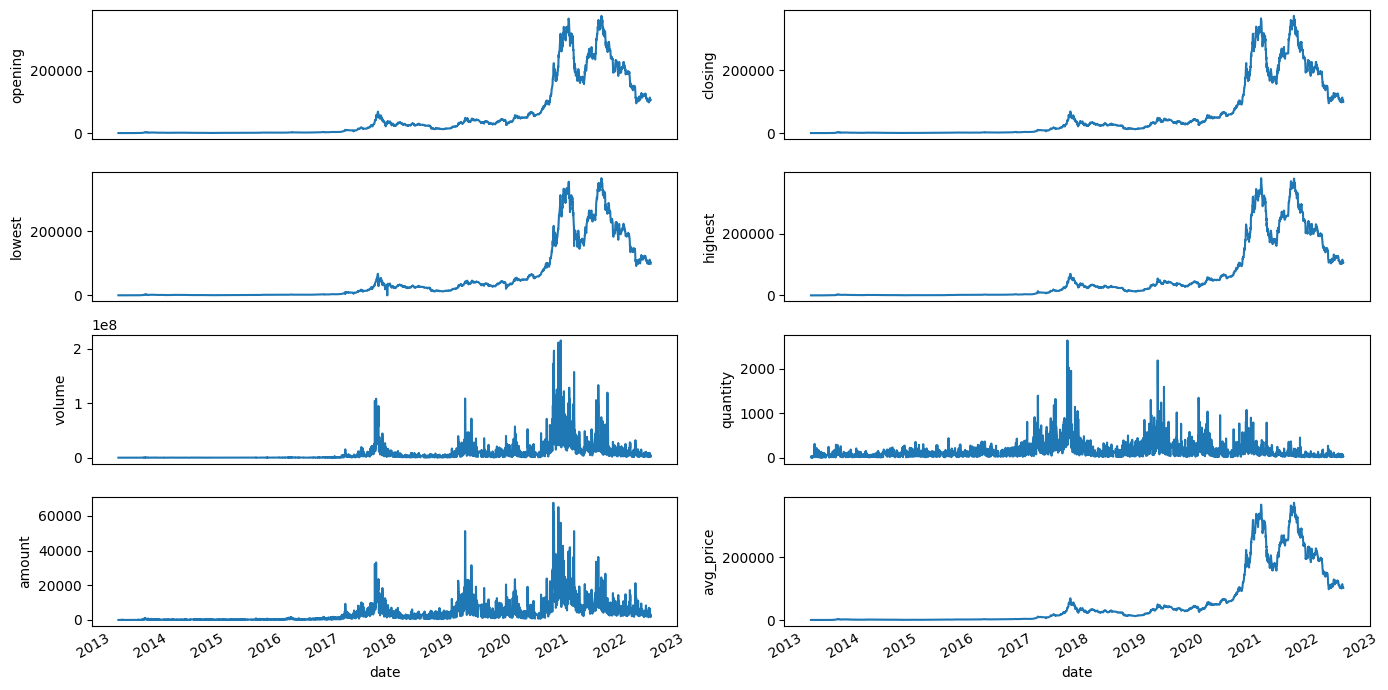

In [8]:
# Plot line charts
df_plot = btc_time_series_df.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))

for i, ax in enumerate(fig.axes):
    sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
    ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.tight_layout()
plt.show()

### Preprocessing and Feature Selection

In [9]:
# Indexing Batches
train_df = btc_time_series_df.sort_values(by=['date']).copy()

# List of considered Features
FEATURES = ['highest', 'lowest', 'opening', 'closing', 'volume']

print("FEATURE LIST")
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['closing']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['highest', 'lowest', 'opening', 'closing', 'volume']


,highest,lowest,opening,closing,volume,Prediction
date,,,,,,
2022-09-14,107299.997850,102149.369863,106479.060000,104024.191772,4.096432e+06,104024.191772
2022-09-15,105285.790000,102600.020000,104323.479770,103800.000010,4.151056e+06,103800.000010
2022-09-16,110000.000000,102700.990000,104121.956578,105032.010000,5.728302e+06,105032.010000
2022-09-17,106431.489464,104500.000000,104998.127154,105876.453820,1.437172e+06,105876.453820
2022-09-18,105940.250000,98944.830000,105799.472484,99251.396010,2.539739e+06,99251.396010


In [10]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['closing'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)


(3906, 5)


In [13]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("closing")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(3075, 50, 5) (3075,)
(781, 50, 5) (781,)
0.0005369384236361683
0.0005369384236361683


### Model Training

In [20]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

250 50 5


In [22]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )

Epoch 1/50


2022-09-21 19:07:53.835442: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2022-09-21 19:07:54.613056: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


193/193 [==============================] - 5s 9ms/step - loss: 8.6935e-05 - val_loss: 0.0036
Epoch 2/50
193/193 [==============================] - 1s 7ms/step - loss: 2.8657e-05 - val_loss: 0.0029
Epoch 3/50
193/193 [==============================] - 1s 7ms/step - loss: 2.2931e-05 - val_loss: 9.2072e-04
Epoch 4/50
193/193 [==============================] - 1s 7ms/step - loss: 2.0013e-05 - val_loss: 8.2619e-04
Epoch 5/50
193/193 [==============================] - 1s 7ms/step - loss: 1.6320e-05 - val_loss: 0.0088
Epoch 6/50
193/193 [==============================] - 1s 7ms/step - loss: 2.7142e-05 - val_loss: 7.7008e-04
Epoch 7/50
193/193 [==============================] - 1s 7ms/step - loss: 1.8909e-05 - val_loss: 0.0024
Epoch 8/50
193/193 [==============================] - 1s 7ms/step - loss: 1.4423e-05 - val_loss: 5.9901e-04
Epoch 9/50
193/193 [==============================] - 1s 6ms/step - loss: 1.5730e-05 - val_loss: 4.9759e-04
Epoch 10/50
193/193 [==============================] - 

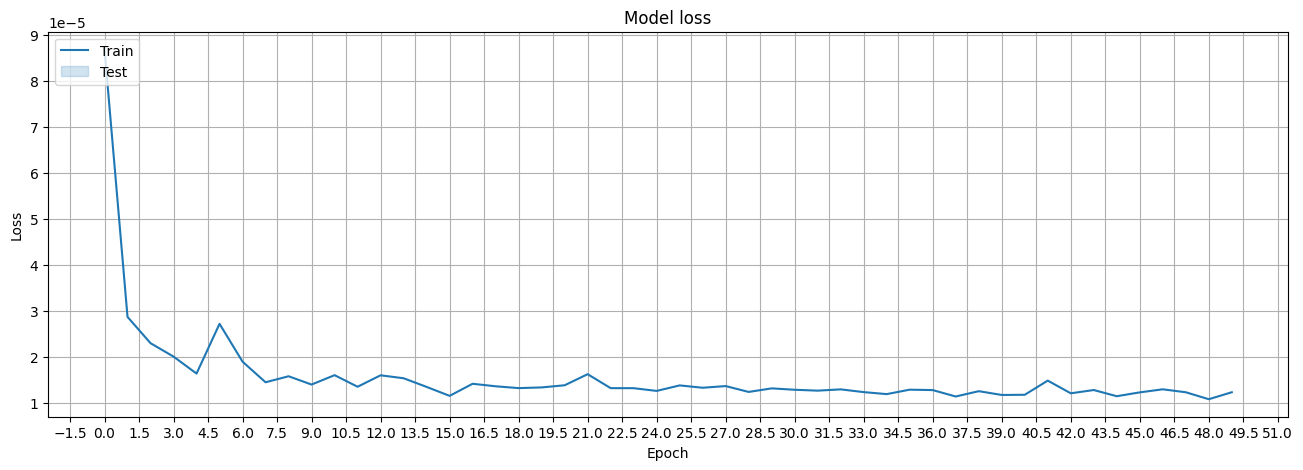

In [23]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

### Evaluate Model Performance

In [28]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

25/25 [==============================] - 0s 3ms/step
Median Absolute Error (MAE): 6955.17
Mean Absolute Percentage Error (MAPE): 3.13 %
Median Absolute Percentage Error (MDAPE): 2.61 %


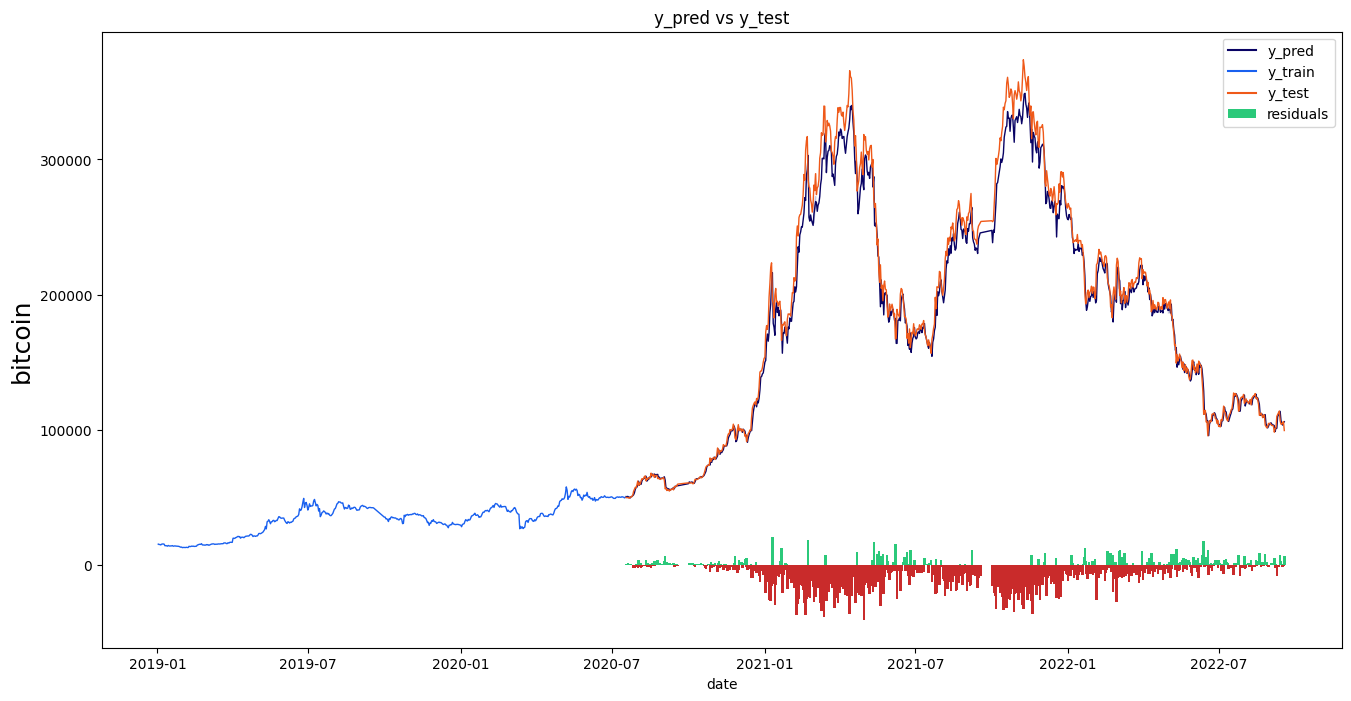

In [31]:
# The date from which on the date is displayed
display_start_date = "2019-01-01" 

# Add the difference between the valid and predicted prices
train = pd.DataFrame(data_filtered_ext['closing'][:train_data_len + 1]).rename(columns={'closing': 'y_train'})
valid = pd.DataFrame(data_filtered_ext['closing'][train_data_len:]).rename(columns={'closing': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel("bitcoin", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

# Create the bar plot with the differences
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
ax1.bar(height=df_union_zoom['residuals'].dropna(), x=df_union_zoom['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
plt.legend()
plt.show()

### Predict Next Day's Price

In [40]:
df_temp = btc_time_series_df[-sequence_length:]
new_df = df_temp.filter(FEATURES)

N = sequence_length

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(new_df['closing'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print(f'The close price for bitcoin at {end_date} was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

1/1 [==============================] - 0s 14ms/step
The close price for bitcoin at 2022-09-21 was 99251.4
The predicted close price is 99938.71875 (+0.69%)
